# NLP Result Analysis
Analyse a excel sheet of NLP classification results.
Template is filled in 

Use yaml config

In [1]:
use_config_file = True
config_file = 'config/result-analysis-tn-t.yaml'
cfg = None
if use_config_file:
    import yaml
    with open(config_file, 'r') as yaml_file:
        cfg = yaml.safe_load(yaml_file)


Set path of excel sheet

In [2]:
path_excel_sheet = "./../resources/context_results.xlsx"
if use_config_file:
    path_excel_sheet = cfg['path_excel_sheet']

Set label and classification columns

In [3]:
column_actual = 'label longembolie'
column_predicted = 'target-snomedct:59282003'

if use_config_file:
    column_actual = cfg['column_actual']
    column_predicted = cfg['column_predicted']

Read columns and determine values, in case of key error, make sure the columns are set correctly

In [4]:
import pandas
df = pandas.read_excel(path_excel_sheet, header=0)

actual_values = df[column_actual].value_counts().index.tolist() 
predicted_values = df[column_predicted].value_counts().index.tolist() 

print('actual category values:', actual_values)
print('predicted category values:', predicted_values)

actual category values: ['T4', 'T2', 'T1', 'T3', '?']
predicted category values: ['T2', 'T4', 'T1', 'T3', 'T0']


Manually set valid values from actual and predicted categories (other values will be ignored)

In [5]:
valid_values = [True, False]
valid_values = ['T1', 'T2', 'T3', 'T4']
if use_config_file:
    valid_values = cfg['valid_values']

Check valid values

In [6]:
df_valid = df[df[column_actual].isin(valid_values)]
df_valid = df_valid[df_valid[column_predicted].isin(valid_values)]

actual_index_valid = df_valid[column_actual].value_counts().index.tolist() 
predicted_index_valid = df_valid[column_actual].value_counts().index.tolist() 

print('actual category values:', actual_index_valid)
print('predicted category values:', predicted_index_valid)

actual category values: ['T4', 'T2', 'T1', 'T3']
predicted category values: ['T4', 'T2', 'T1', 'T3']


Histograms Original

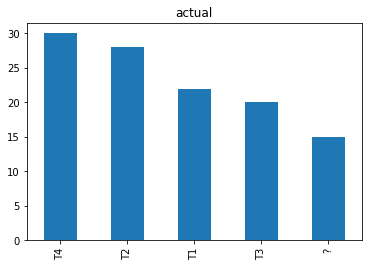

In [7]:
actual_bar_plt = df[column_actual].value_counts().plot(kind='bar', title='actual')

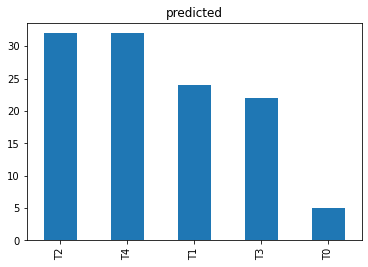

In [8]:
predicted_bar_plt = df[column_predicted].value_counts().plot(kind='bar', title='predicted')

Histograms Valid Values only

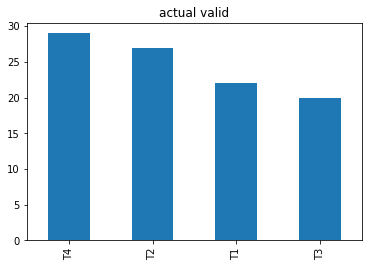

In [9]:
actual_valid_bar_plot = df_valid[column_actual].value_counts().plot(kind='bar', title='actual valid')

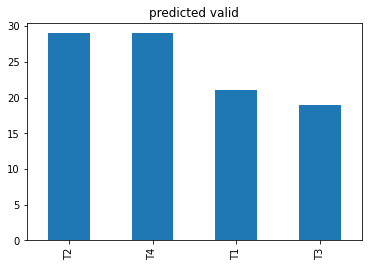

In [10]:
predicted_valid_bar_plt = df_valid[column_predicted].value_counts().plot(kind='bar', title='predicted valid')

Compute accuracy

In [11]:
df = df_valid
accuracy = df[df[column_predicted] == df[column_actual]].shape[0]/df.shape[0]
print("Accuracy = " + str(round(accuracy * 100, 2)) + "%")

Accuracy = 92.86%


F-scores

In [12]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.utils.multiclass import unique_labels
y_actu = pandas.Series(df[column_actual], name='Actual')
y_pred = pandas.Series(df[column_predicted], name='Predicted')

labels = unique_labels(y_actu, y_pred)
prf = precision_recall_fscore_support(y_actu, y_pred, average=None, labels=valid_values)
evaldf = pandas.DataFrame({"Precision": prf[0], "Recall": prf[1], "F-score": prf[2]}, index=valid_values)
print(evaldf)

    Precision    Recall   F-score
T1   1.000000  0.954545  0.976744
T2   0.896552  0.962963  0.928571
T3   0.947368  0.900000  0.923077
T4   0.896552  0.896552  0.896552


Create confusion matrix

In [13]:
confusion_matrix = pandas.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("CONFUSION MATRIX")
print(confusion_matrix)

CONFUSION MATRIX
Predicted  T1  T2  T3  T4  All
Actual                        
T1         21   1   0   0   22
T2          0  26   0   1   27
T3          0   0  18   2   20
T4          0   2   1  26   29
All        21  29  19  29   98


Plot confusion matrix

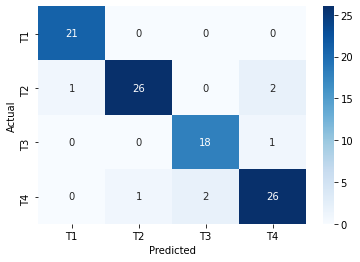

In [14]:
import seaborn
import matplotlib
data = {'y_Actual':    df_valid[column_predicted],
        'y_Predicted': df_valid[column_actual]
        }

df = pandas.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pandas.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

confusion_matrix_heatmap = seaborn.heatmap(confusion_matrix, annot=True, cmap=matplotlib.cm.Blues)

Save confusion matix figure to file

In [15]:
file_type_eps = False
output_path = './../resources/confusion_matrix'

if file_type_eps:
    confusion_matrix_heatmap.figure.savefig(output_path + ".eps", dict="eps")
else:
   confusion_matrix_heatmap.figure.savefig(output_path + ".png")